In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
sns.set_theme()

In [3]:
tips = sns.load_dataset("tips")
tips.head(5)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

### 1- Relplot
##### The function relplot() is named that way because it is designed to visualize many different statistical relationships.
##### While scatter plots are often effective, relationships where one variable represents a measure of time are better represented by a line. 
##### The relplot() function has a convenient kind parameter that lets you easily switch to  alternate representation

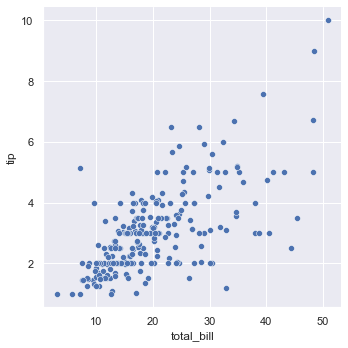

In [4]:
sns.relplot(data=tips, x="total_bill", y="tip")

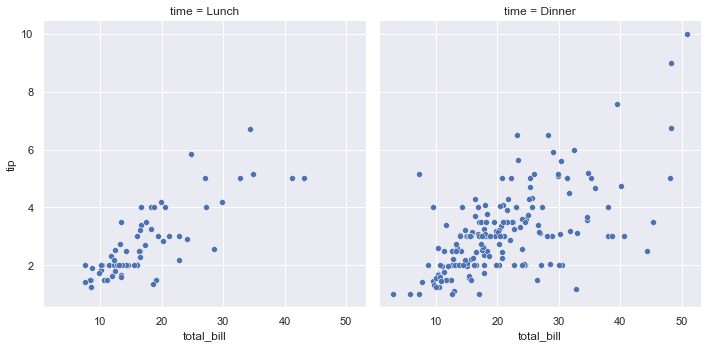

In [5]:
sns.relplot(data=tips, x="total_bill", y="tip", col="time");

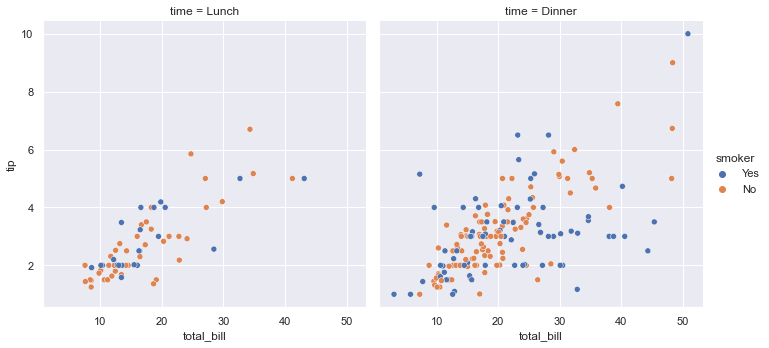

In [6]:
sns.relplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker");

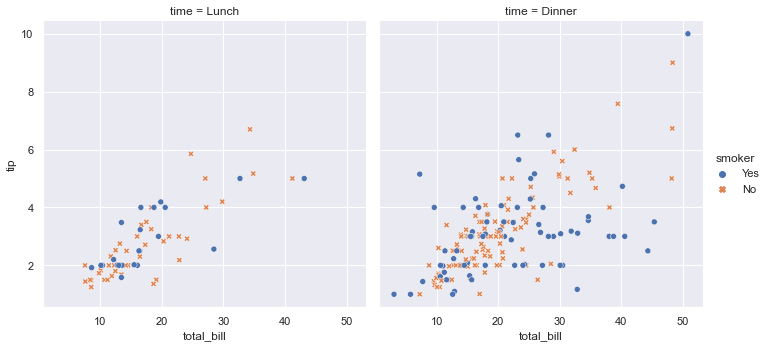

In [7]:
sns.relplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker",
        style="smoker");

<Figure size 1296x864 with 0 Axes>

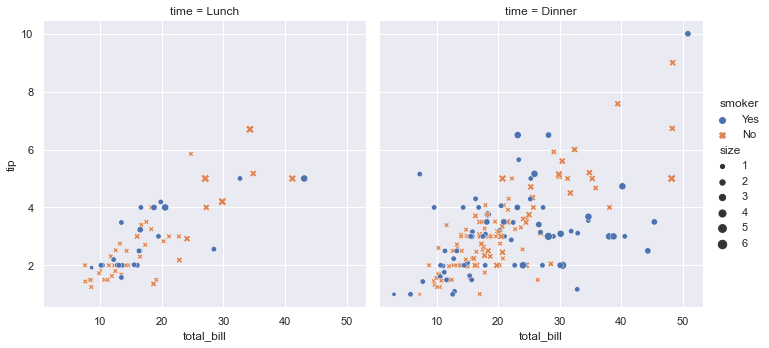

In [8]:
plt.figure(figsize=(18, 12))
sns.relplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker",
            style="smoker", size="size");

In [9]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


In [10]:
dots = sns.load_dataset("dots")
dots.head()

align choice  time  coherence  firing_rate
0  dots     T1   -80        0.0    33.189967
1  dots     T1   -80        3.2    31.691726
2  dots     T1   -80        6.4    34.279840
3  dots     T1   -80       12.8    32.631874
4  dots     T1   -80       25.6    35.060487

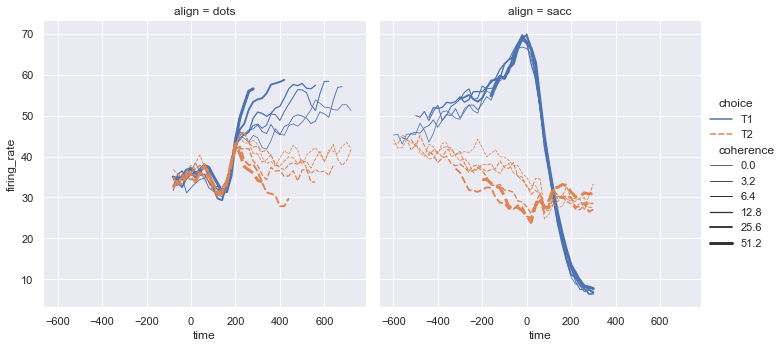

In [11]:
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    col="align",
    hue="choice",
    size="coherence",
    style="choice"
)

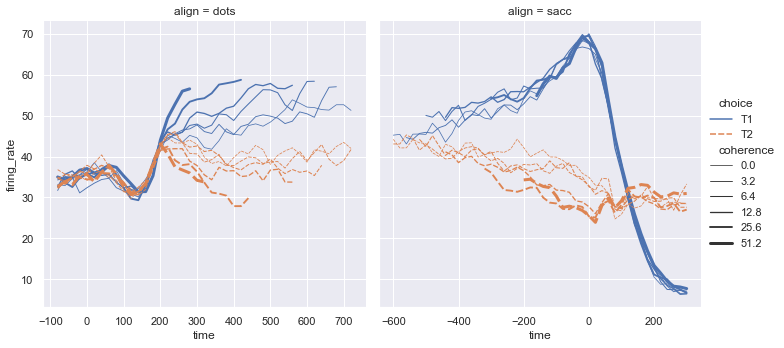

In [12]:
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    col="align",
    hue="choice",
    size="coherence",
    style="choice",
    facet_kws={"sharex":False}
)

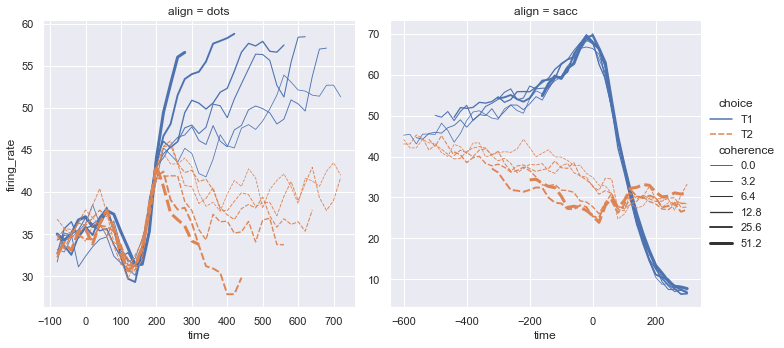

In [13]:
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    col="align",
    hue="choice",
    size="coherence",
    style="choice",
    facet_kws={"sharex":False, "sharey":False}
)

In [14]:
fmri = sns.load_dataset("fmri")
fmri.head()

subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970

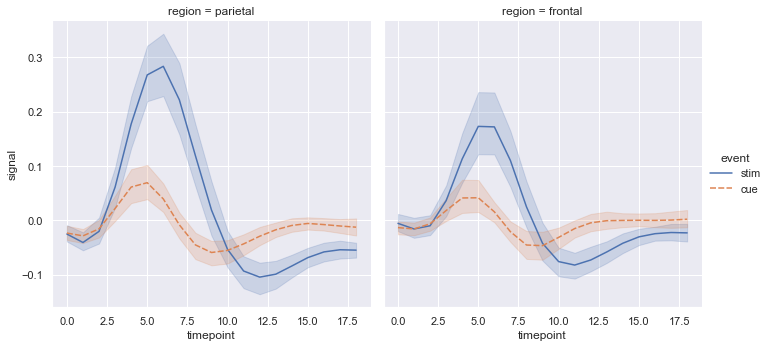

In [15]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal",
    col="region",
    hue="event",
    style="event"
)

### 2- Implot()

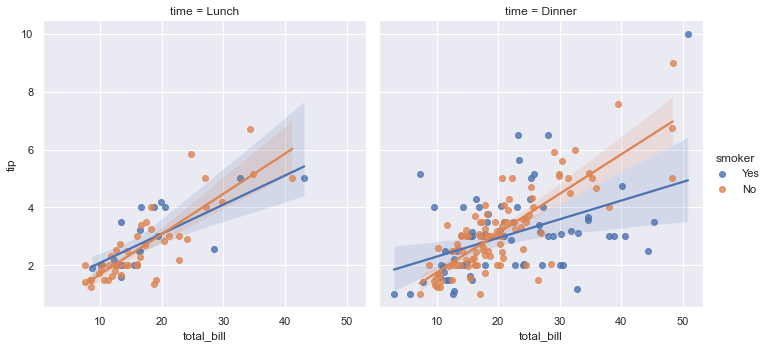

In [16]:
# Statistical estimation in seaborn goes beyond descriptive statistics. 
# For example, it is possible to enhance a scatterplot by including a linear regression model (and its uncertainty) using lmplot():
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")

### 3- Displot
##### Statistical analyses require knowledge about the distribution of variables in your dataset.
##### The seaborn function displot() supports several approaches to visualizing distributions.
##### These include classic techniques like histograms and computationally-intensive approaches like kernel density estimation:

In [17]:
tips.head(1)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2

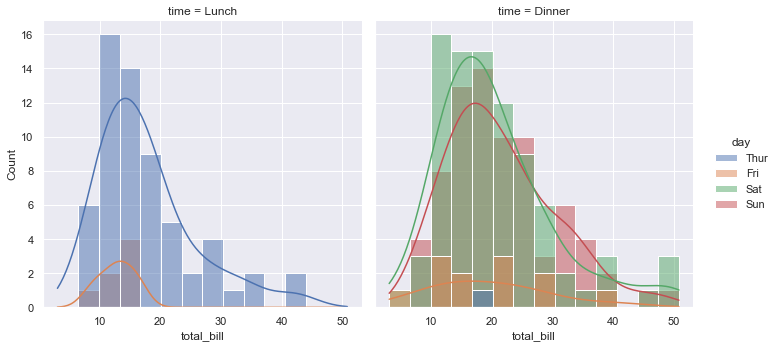

In [18]:
sns.displot(data=tips, x="total_bill", col="time", kde=True, hue="day");

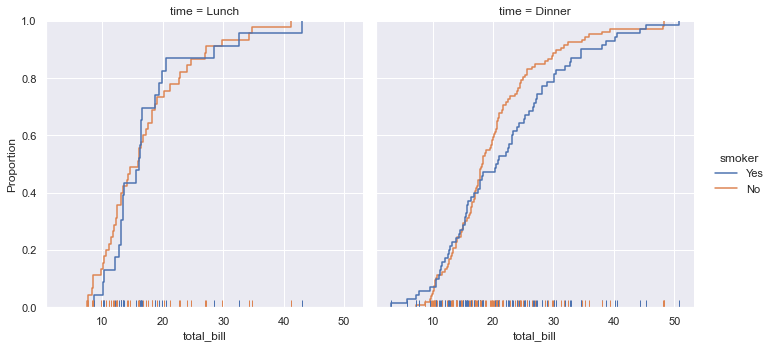

In [19]:
# ecdf stands for empirical cumulative distribution function
sns.displot(data=tips, kind="ecdf", x="total_bill",
            col="time", hue="smoker", rug=True)

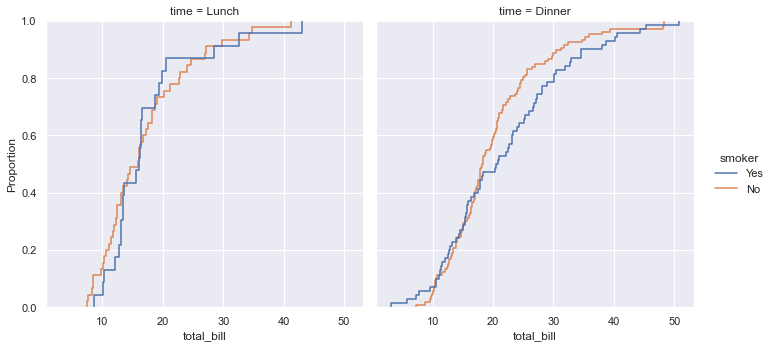

In [20]:
sns.displot(data=tips, kind="ecdf", x="total_bill",
            col="time", hue="smoker", rug=False)

### 3- Catplot
##### Several specialized plot types in seaborn are oriented towards visualizing categorical data. They can be accessed through catplot().

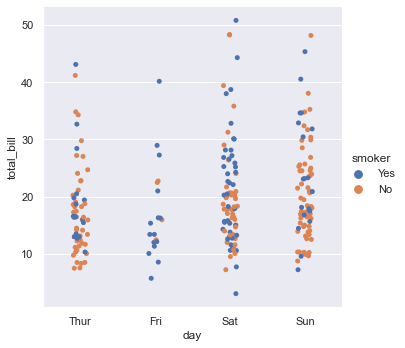

In [21]:
sns.catplot(data=tips, x="day", y="total_bill", hue="smoker");

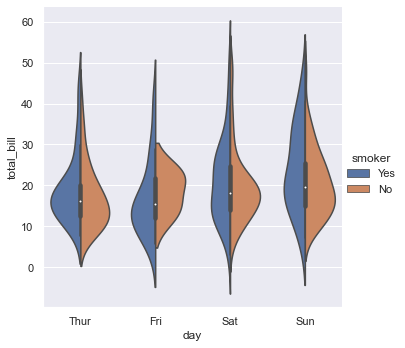

In [22]:
sns.catplot(data=tips, kind="violin", x="day", y="total_bill",
           hue="smoker", split=True)

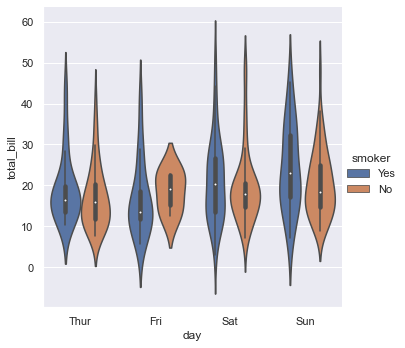

In [23]:
sns.catplot(data=tips, kind="violin", x="day", y="total_bill",
           hue="smoker", split=False)

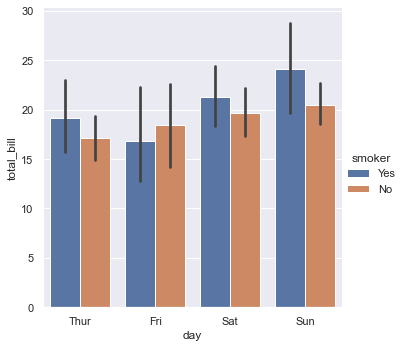

In [24]:
# with barplot, you could show only the mean value and its confidence interval within each nested category.
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker");


In [25]:
tips.shape

(244, 7)

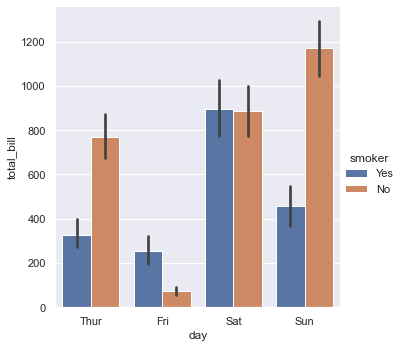

In [26]:
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker",
            estimator=np.sum);

In [27]:
tips.head(2)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3

In [28]:
tips[(tips.day == "Sun") & (tips.smoker == "Yes")]["total_bill"].sum()

458.28

### 4- Jointplot
##### Some seaborn functions combine multiple kinds of plots to quickly give informative summaries of a dataset. 
##### One, jointplot(), focuses on a single relationship. It plots the joint distribution between two variables along with each variable’s marginal distribution:

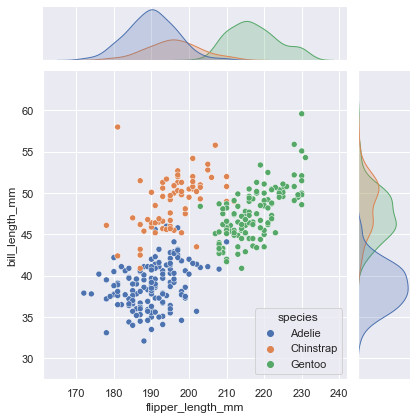

In [29]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins,
             x="flipper_length_mm",
             y="bill_length_mm",
             hue="species");

### 5- Pairplot
#### The other, pairplot(), takes a broader view: it shows joint and marginal distributions for all pairwise relationships and for each variable, respectively:

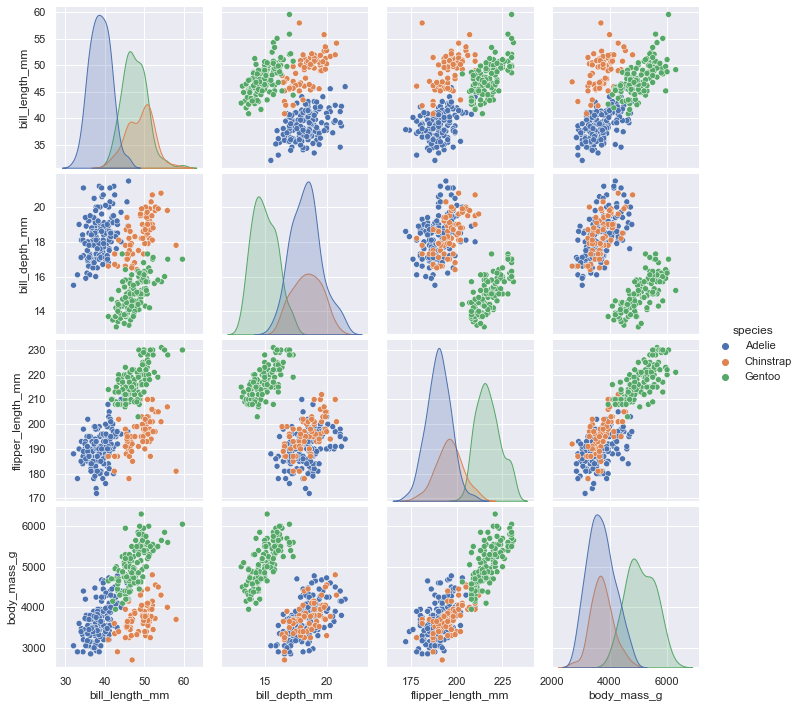

In [30]:
sns.pairplot(data=penguins, hue="species");

### Classes and functions for making complex graphics
##### These tools work by combining axes-level plotting functions with objects that manage the layout of the figure, linking the structure of a dataset to a grid of axes. Both elements are part of the public API, and you can use them directly to create complex figures with only a few more lines of code:

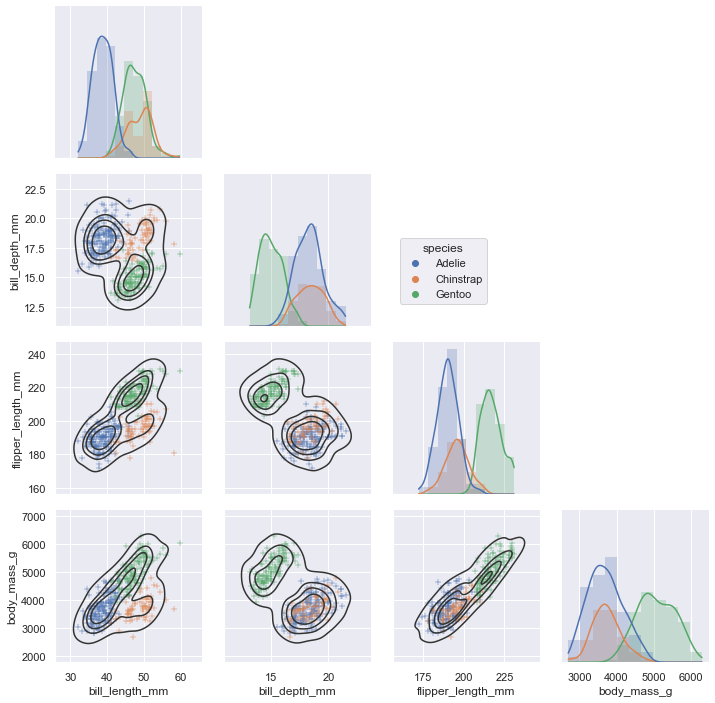

In [31]:
g = sns.PairGrid(penguins, hue="species", corner=True)

g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")

g.map_diag(sns.histplot, kde=True, element="step", linewidth=0)

g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

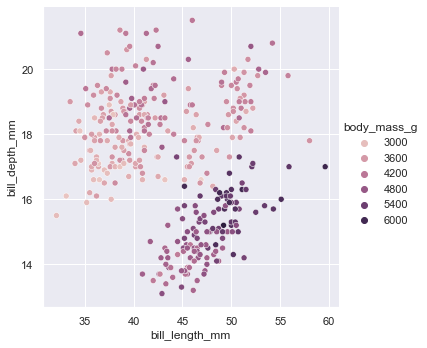

In [32]:
sns.relplot(
    data=penguins,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="body_mass_g"
)

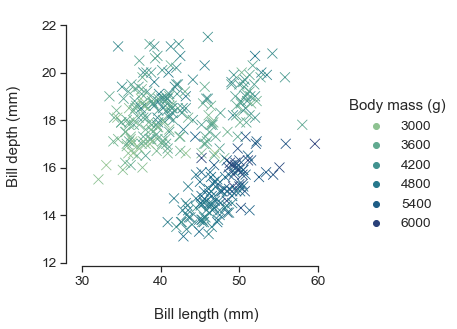

In [33]:
sns.set_theme(style="ticks", font_scale=1.25)
g = sns.relplot(
    data=penguins,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="body_mass_g",
    palette="crest",
    marker="x",
    s=100,
)

g.set_axis_labels("Bill length (mm)", "Bill depth (mm)", labelpad=20)
g.legend.set_title("Body mass (g)"),
g.figure.set_size_inches(6.5, 4.5)
g.ax.margins(.15)
g.despine(trim=True)

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

In [35]:
diamonds = sns.load_dataset("diamonds")
diamonds.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

<AxesSubplot:xlabel='carat', ylabel='price'>

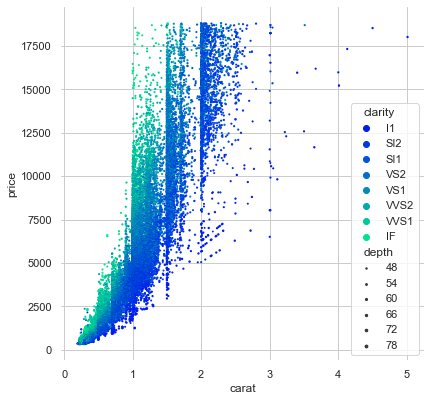

In [36]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(fig, left=True, bottom= True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
               palette="winter",
               hue_order=clarity_ranking,
               sizes=(1, 8), linewidth=0,
               data=diamonds, ax=ax)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

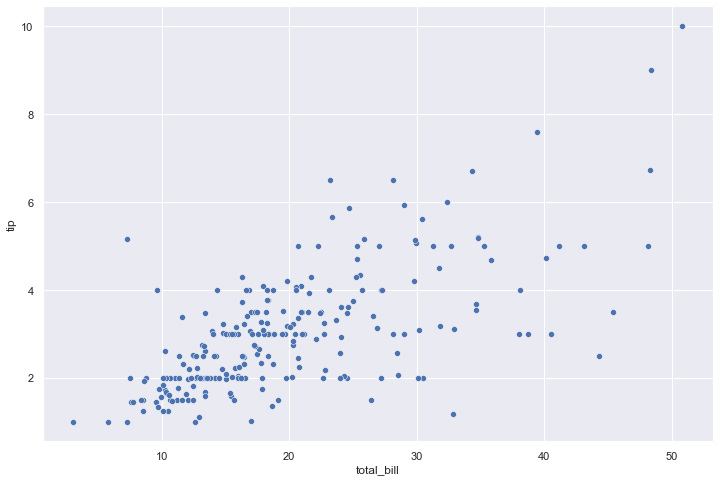

In [41]:
# Scatter plotta iki tane numeric değeri karşılaştırıtız
plt.figure(figsize=(12, 8));
sns.scatterplot(x="total_bill", y="tip", data=tips)


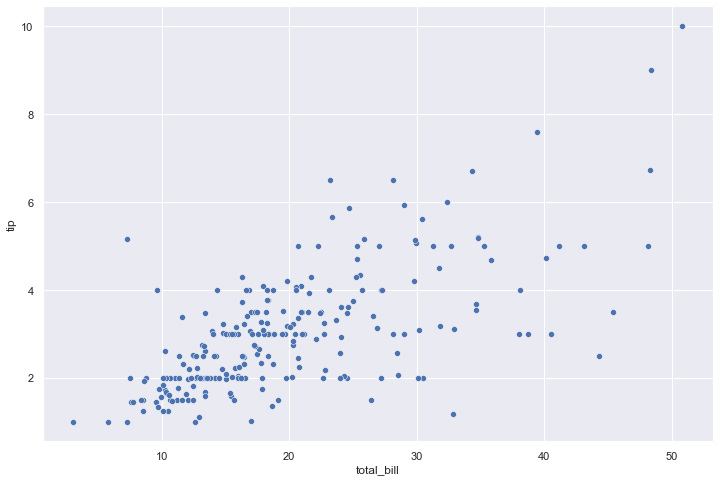

In [39]:
sns.set(rc={"figure.figsize":(12, 8)}, style="darkgrid")
sns.scatterplot(x="total_bill", y="tip", data=tips);

In [42]:
df = sns.load_dataset("tips")
df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

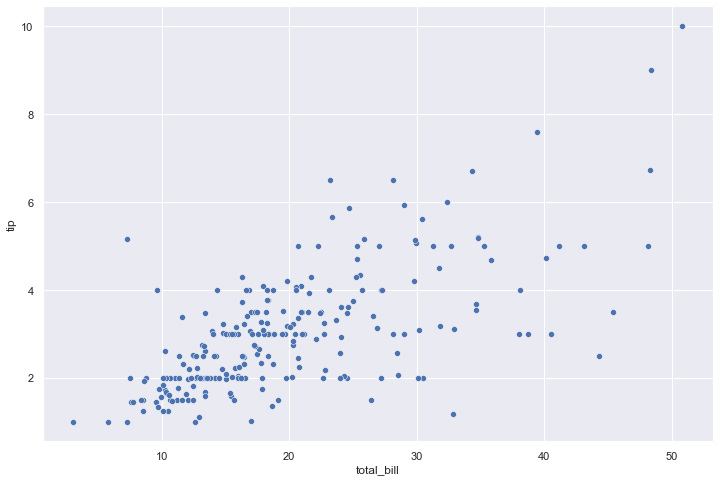

In [43]:
sns.scatterplot(x="total_bill", y="tip", data=df);

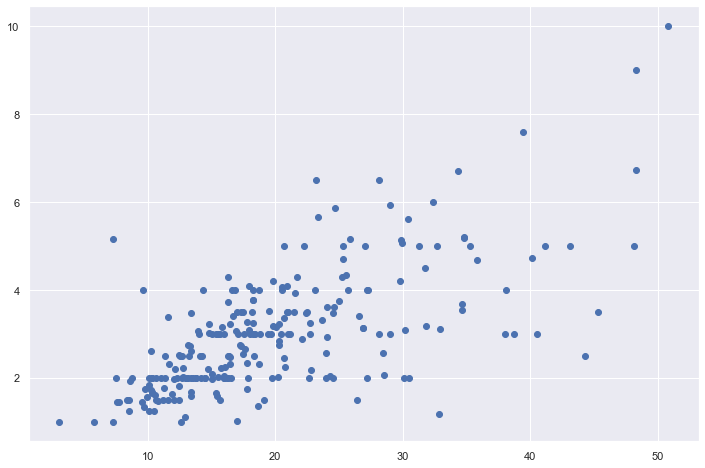

In [44]:
plt.scatter(x="total_bill", y="tip", data=df);

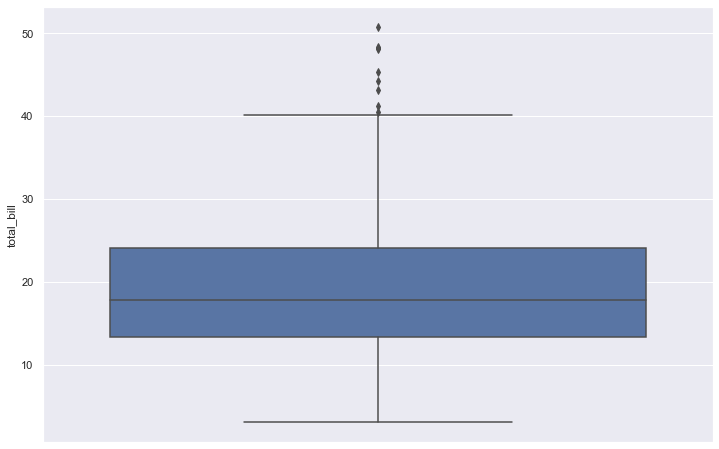

In [45]:
sns.boxplot(y="total_bill", data=df);

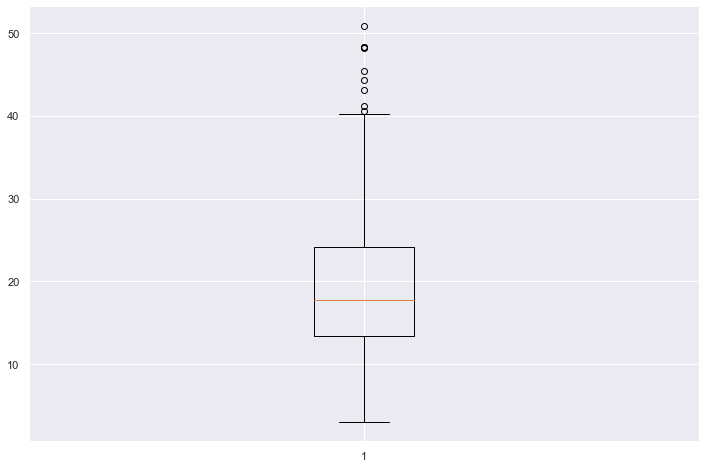

In [46]:
plt.boxplot(x="total_bill", data=df);

In [51]:
df.head(2)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3

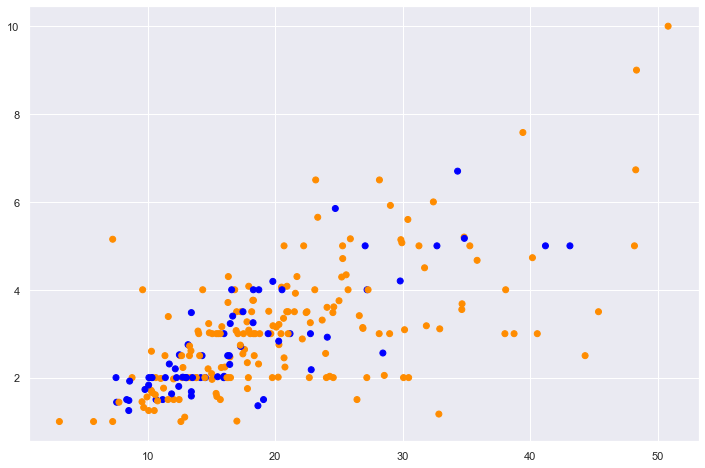

In [50]:
color = {"Lunch" : "blue", "Dinner" : "darkorange"}
plt.scatter(x="total_bill", y="tip", data=df, c=df["time"].map(color));

In [49]:
df["time"].map(color).value_counts()

darkorange    176
blue           68
Name: time, dtype: int64

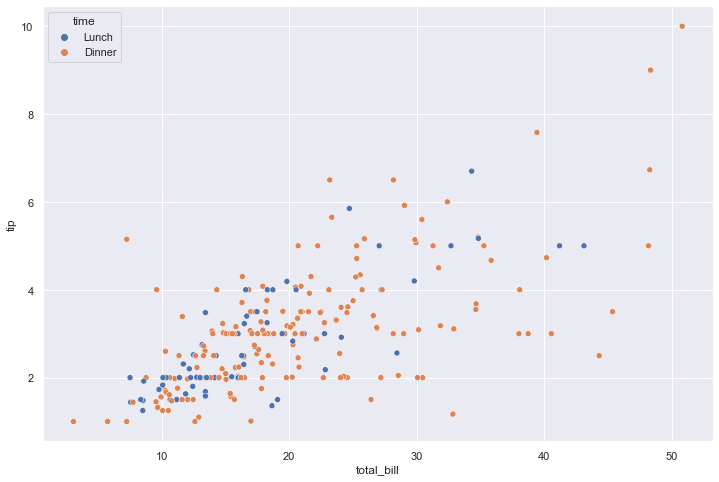

In [53]:
sns.scatterplot(x="total_bill", y="tip", data=df, hue="time");

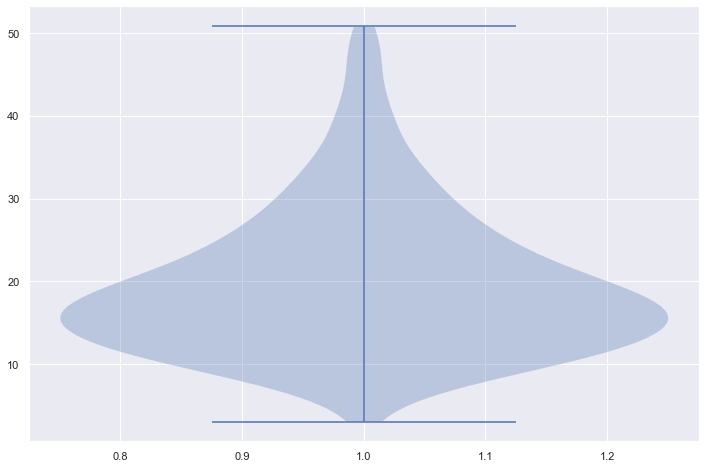

In [54]:
plt.violinplot(df["total_bill"]);

<AxesSubplot:ylabel='total_bill'>

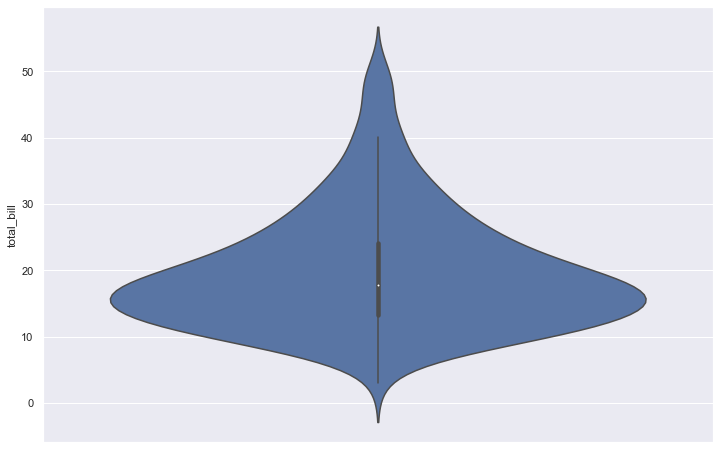

In [57]:
sns.violinplot(y=df["total_bill"])

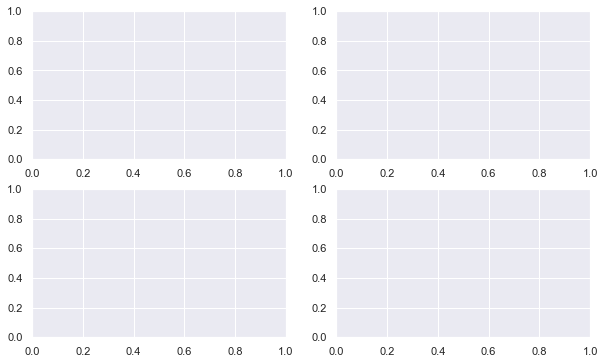

In [58]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

### Matplotlib vs Seaborn

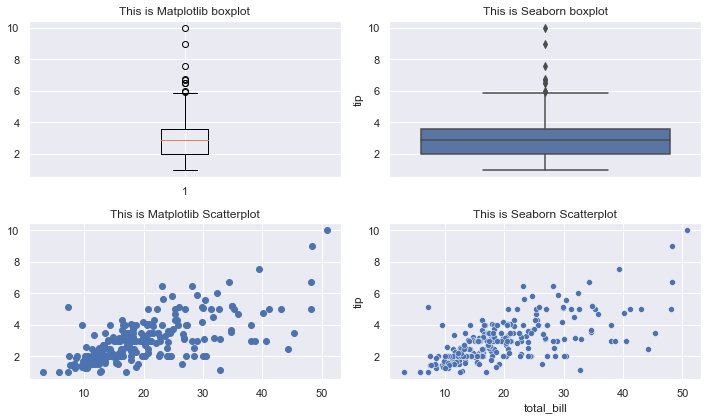

In [70]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

#boxplot-1-matplotlib
ax[0,0].boxplot(x="tip", data=df)
ax[0,0].set_title("This is Matplotlib boxplot")

#boxplot-2- seaborn
sns.boxplot(y="tip", data=df, ax=ax[0,1])
ax[0,1].set_title("This is Seaborn boxplot")

#scatter-1-matplotlib
ax[1,0].scatter(x="total_bill", y="tip", data=df)
ax[1,0].set_title("This is Matplotlib Scatterplot")

#scatter-2-seaborn
sns.scatterplot(x="total_bill", y="tip", data=tips,ax=ax[1, 1])
ax[1,1].set_title("This is Seaborn Scatterplot")

plt.tight_layout()

<Figure size 576x432 with 0 Axes>

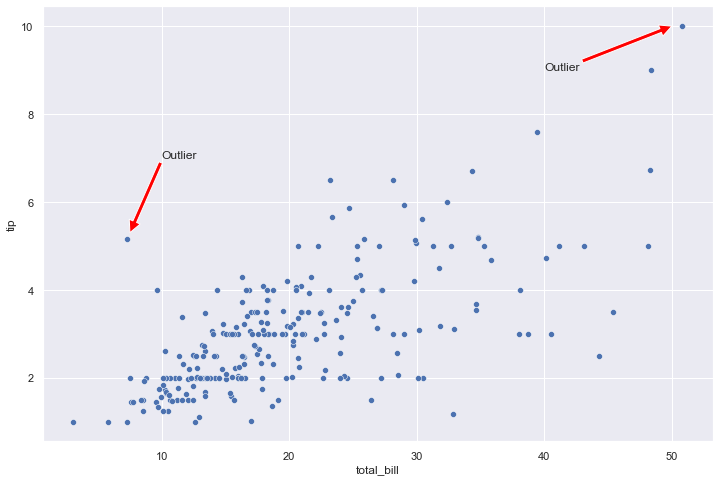

In [79]:
plt.figure(figsize=(8,6))

fig, ax = plt.subplots()
sns.scatterplot(ax=ax, x=df["total_bill"], y=df["tip"])

ax.annotate("Outlier", xy=(50,10), xytext=(40, 9),
            arrowprops={"facecolor" : "red"});

ax.annotate("Outlier", xy=(7.5, 5.3), xytext=(10, 7),
           arrowprops={"facecolor" : "red"});

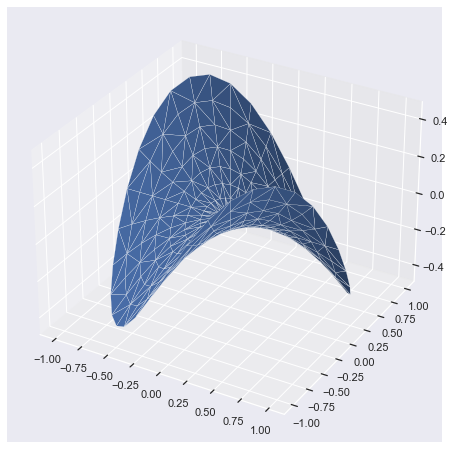

In [83]:
from mpl_toolkits import mplot3d

n_radii = 8
n_angles = 36

radii = np.linspace(0.125, 1.0, n_radii)
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)[..., np.newaxis]

x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())
z = np.sin(-x*y)

ax = plt.figure(figsize=(14,8)).add_subplot(projection='3d')
ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)

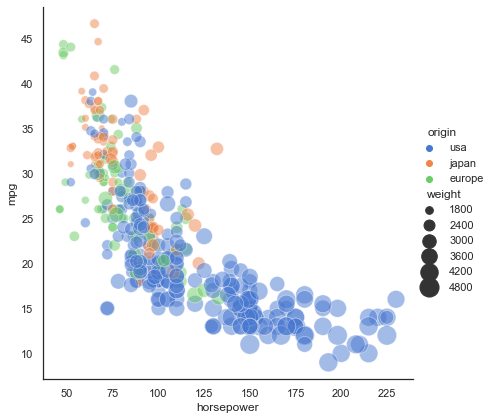

In [88]:
sns.set_theme(style="white")
mpg = sns.load_dataset("mpg")

sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg);

###  Scatterplot

In [90]:
sns.set_theme(style="darkgrid")

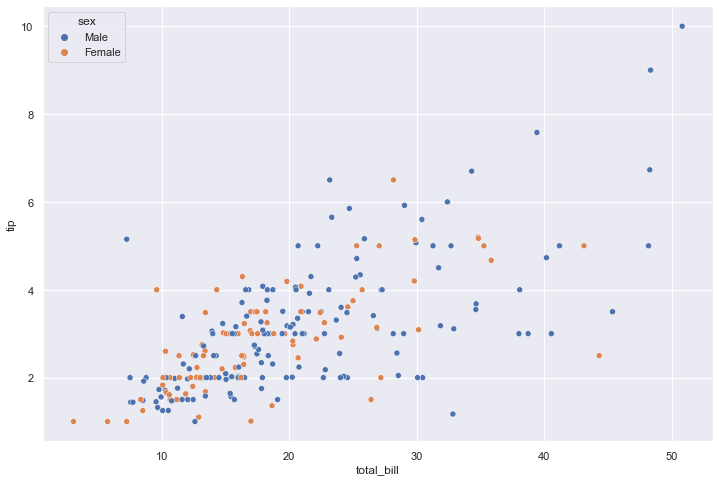

In [91]:
sns.scatterplot(x="total_bill", y="tip", data=tips, hue="sex");

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

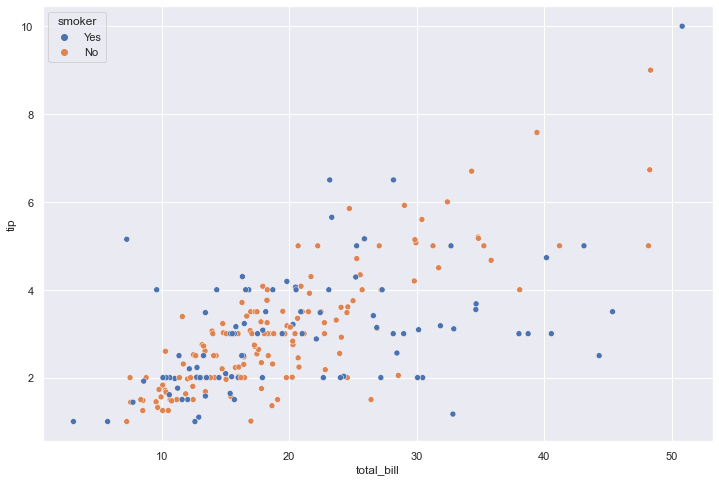

In [92]:
sns.scatterplot(x="total_bill", y="tip", data=tips, hue="smoker")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

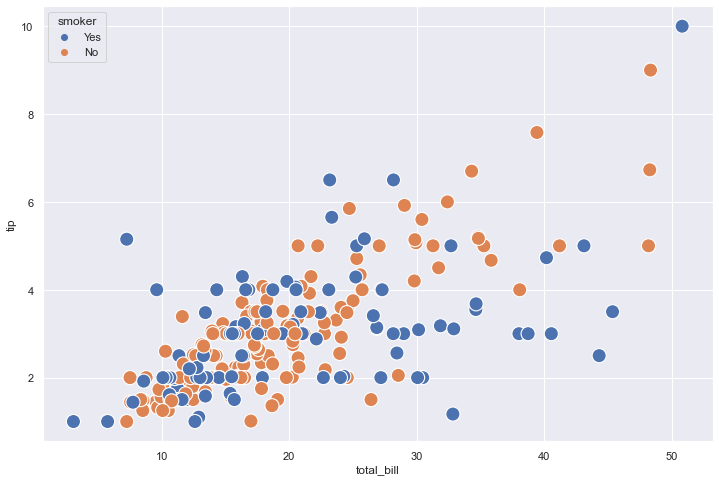

In [97]:
sns.scatterplot(x="total_bill", y="tip", data=tips, hue="smoker",s=200)

In [98]:
tips.head(2)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

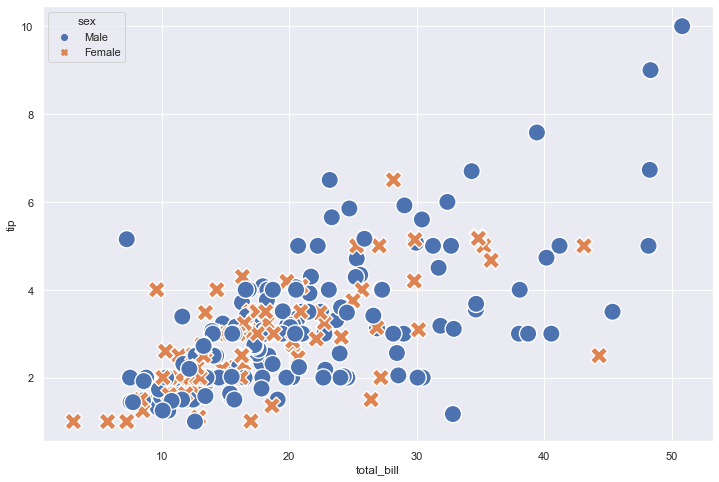

In [100]:
sns.scatterplot(x="total_bill", y="tip", data=tips, style="sex", s=300, hue="sex")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

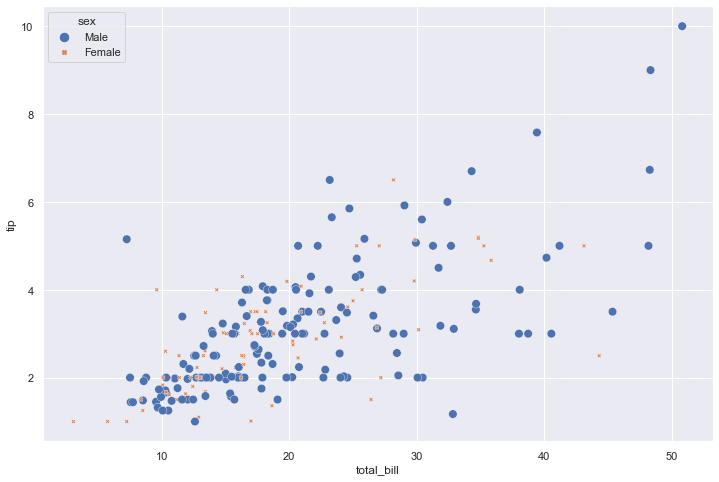

In [106]:
sns.scatterplot(data=tips, x="total_bill", y="tip", style="sex", size="sex", hue="sex")

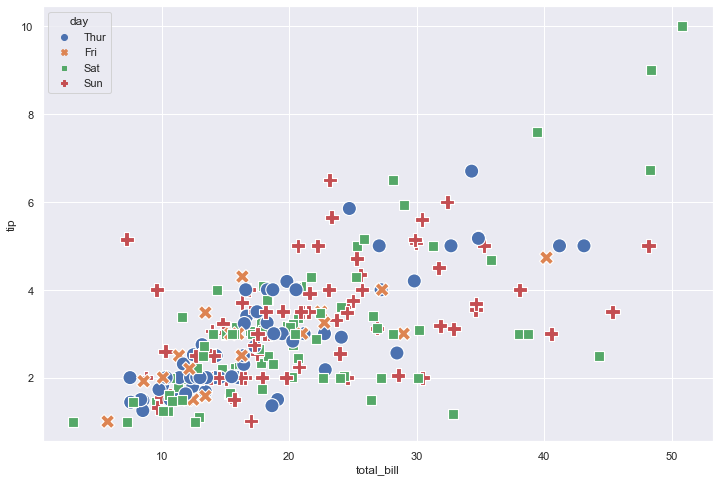

In [107]:
sns.scatterplot(x="total_bill", y="tip", data=tips,
                hue="day", s=200, style="day");

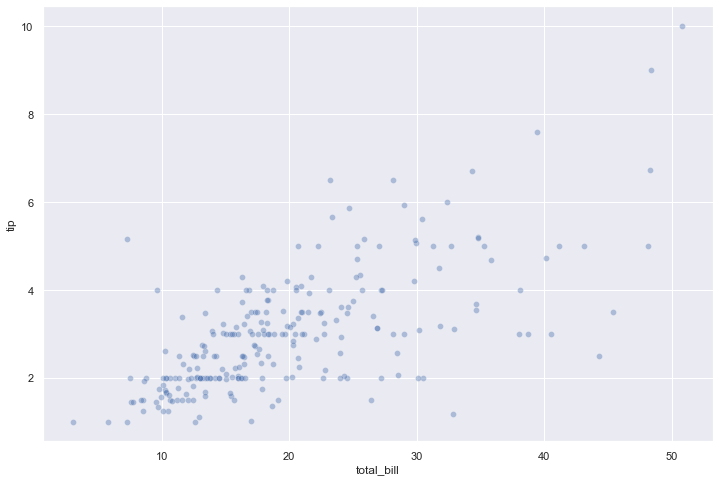

In [108]:
sns.scatterplot(x="total_bill", y="tip",data=tips, alpha=0.4);

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

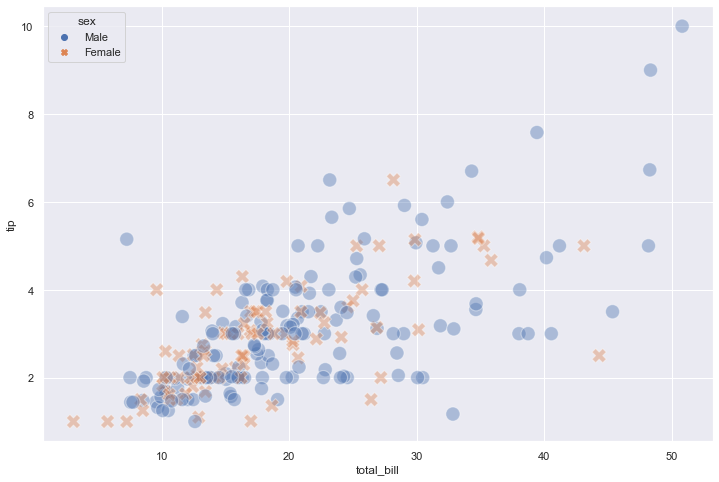

In [110]:
sns.scatterplot(x="total_bill", y="tip", data=tips,
                alpha=0.4, s=200, style="sex", hue="sex")

In [111]:
plt.gcf().canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

<Figure size 864x576 with 0 Axes>

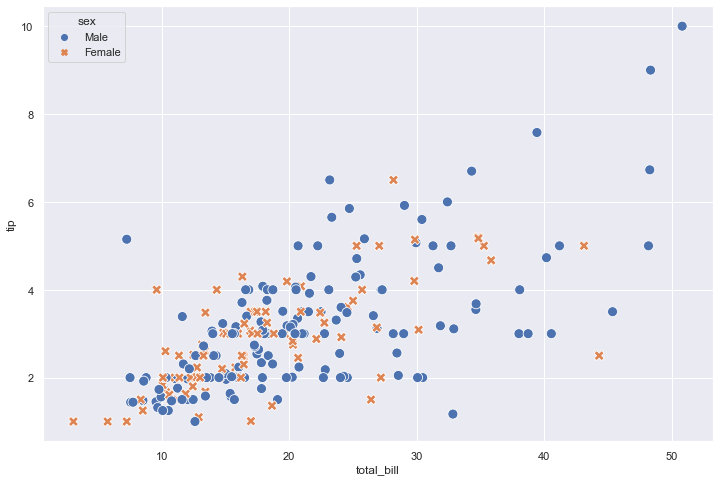

In [114]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="total_bill", y="tip",data=tips,
                style="sex", hue="sex", s=100,);

plt.savefig("scatterplot.pdf")

In [116]:
tips.head(1)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2

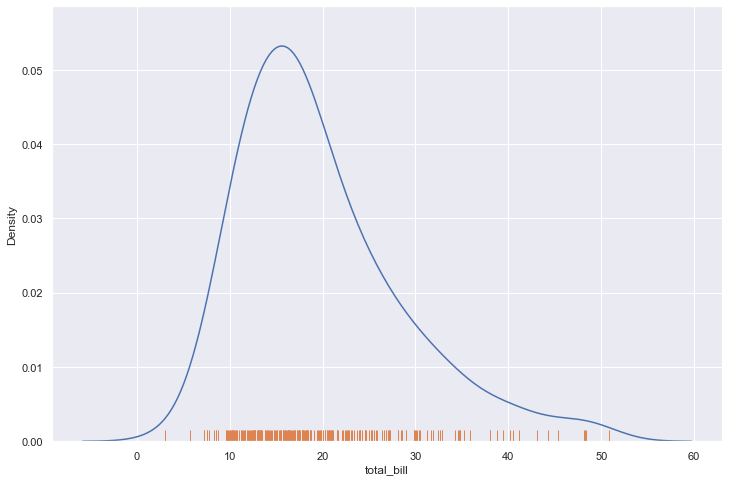

In [119]:
sns.kdeplot(data=tips, x="total_bill")
sns.rugplot(data=tips, x="total_bill");

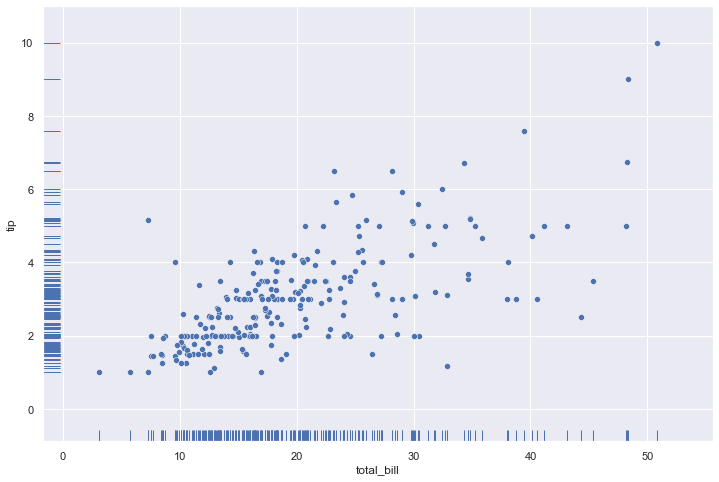

In [123]:
sns.scatterplot(data=tips, x="total_bill", y="tip")
sns.rugplot(data=tips, x="total_bill", y="tip");

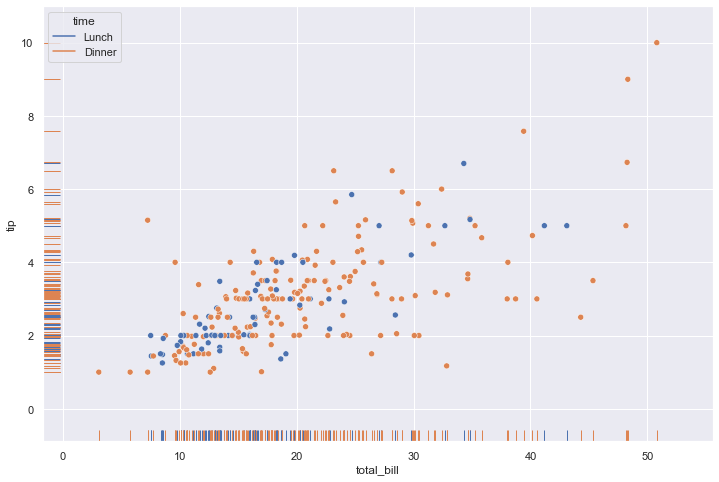

In [130]:
sns.scatterplot(x="total_bill", y="tip", data=tips, hue="time")
sns.rugplot(x="total_bill", y="tip", data=tips, hue="time");

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

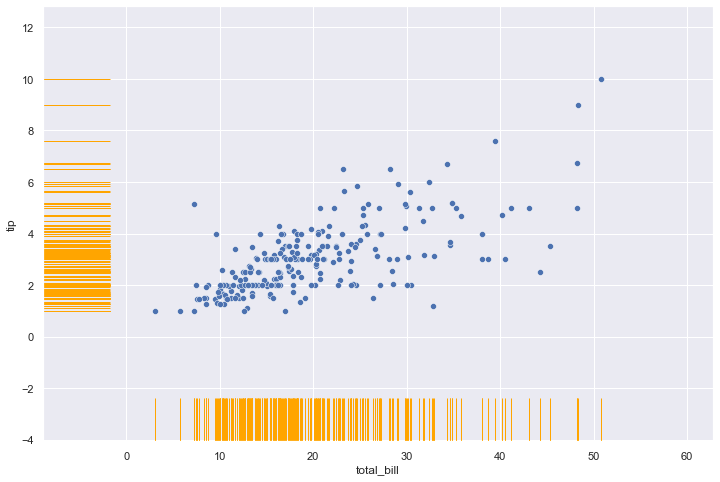

In [134]:
sns.scatterplot(data=tips, x="total_bill", y="tip")
sns.rugplot(data=tips, x="total_bill", y="tip", height=.1, color="orange")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

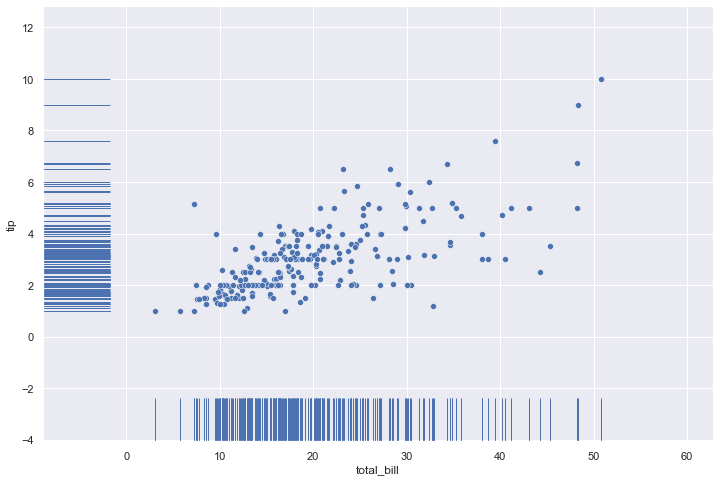

In [139]:
sns.scatterplot(data=tips, x="total_bill", y="tip")
sns.rugplot(data=tips, x="total_bill", y="tip", height=0.1)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

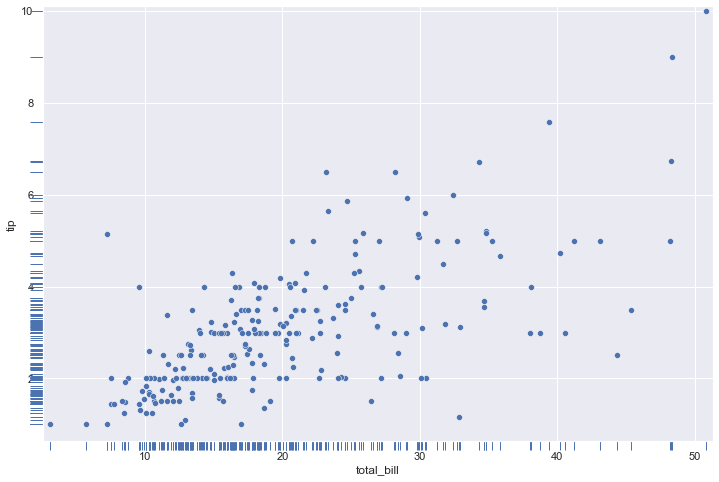

In [145]:
sns.scatterplot(data=tips, x="total_bill", y="tip")
sns.rugplot(data=tips, x="total_bill", y="tip", height=-0.02, clip_on=False)

In [147]:
diamonds.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

<AxesSubplot:xlabel='carat', ylabel='price'>

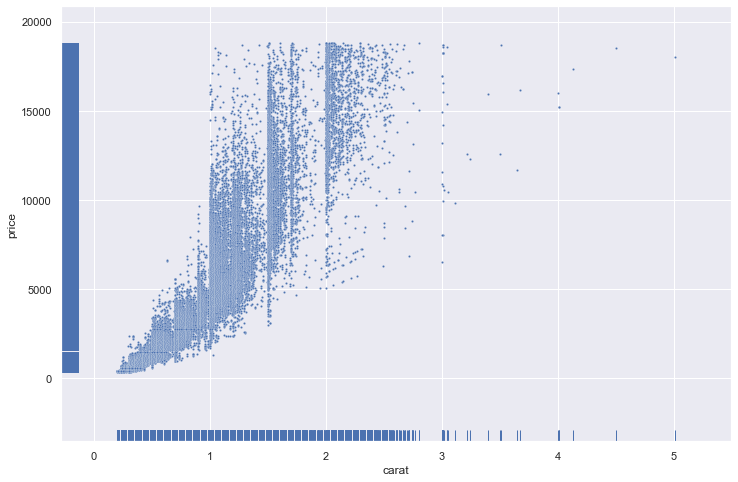

In [150]:
sns.scatterplot(data=diamonds, x="carat", y="price", s=5)
sns.rugplot(data=diamonds, x="carat", y="price")

<AxesSubplot:xlabel='carat', ylabel='price'>

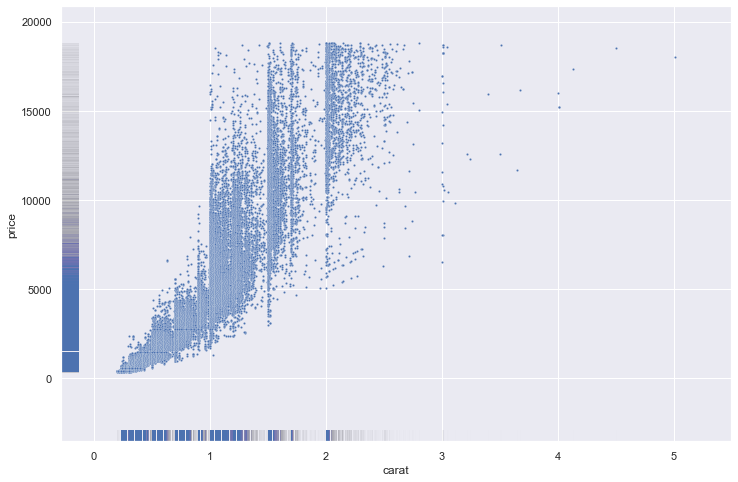

In [152]:
sns.scatterplot(data=diamonds, x="carat", y="price", s=5)
sns.rugplot(data=diamonds, x="carat", y="price", lw=1, alpha=.005)

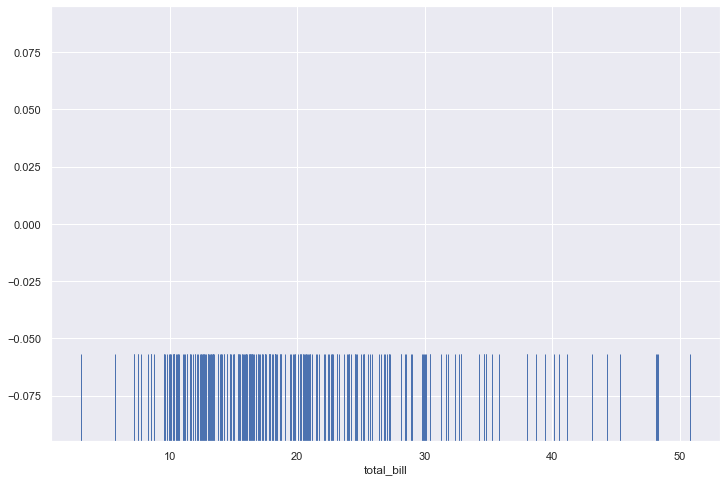

In [156]:
sns.rugplot(x="total_bill", data=tips, height=0.2);

<AxesSubplot:xlabel='tip', ylabel='Density'>

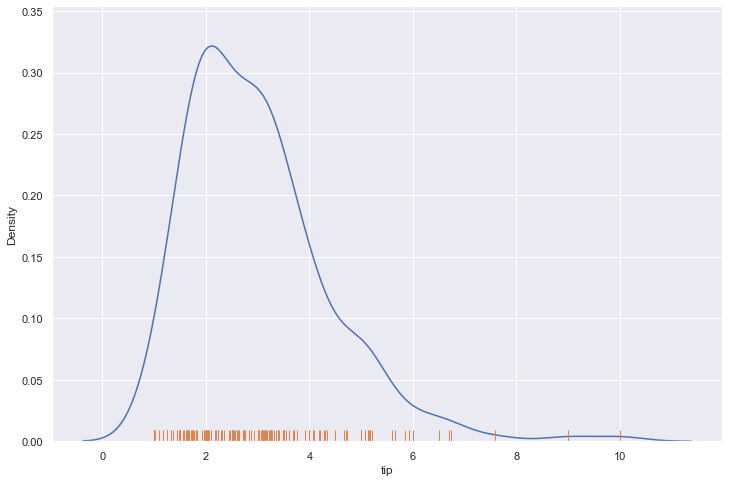

In [161]:
sns.kdeplot(data=tips, x="tip");
sns.rugplot(data=tips, x="tip")

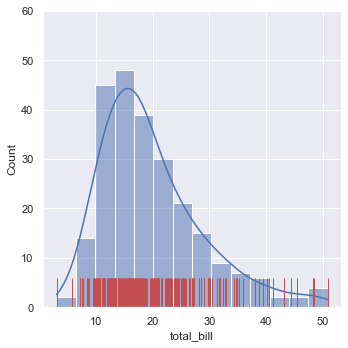

In [166]:
sns.displot(data=tips, x="total_bill", kde=True, rug=True,
            rug_kws={"color": "r", "height": 0.1});

###  Displot & Histplot


In [168]:
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

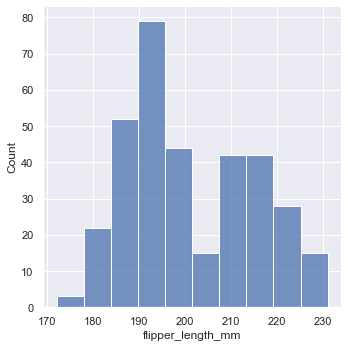

In [169]:
sns.displot(data=penguins, x="flipper_length_mm");

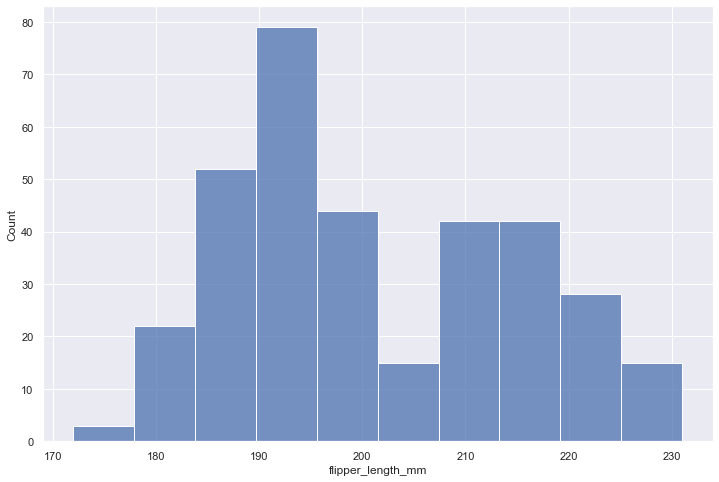

In [171]:
sns.histplot(data=penguins,x="flipper_length_mm");

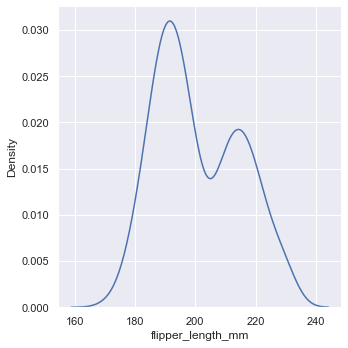

In [172]:
sns.displot(data=penguins, x="flipper_length_mm", kind="kde");

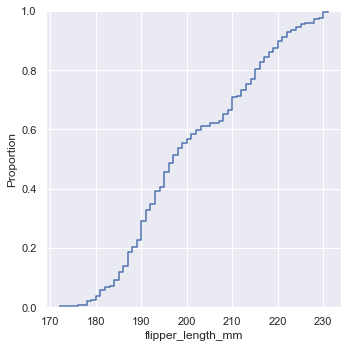

In [173]:
sns.displot(data=penguins, x="flipper_length_mm", kind="ecdf")

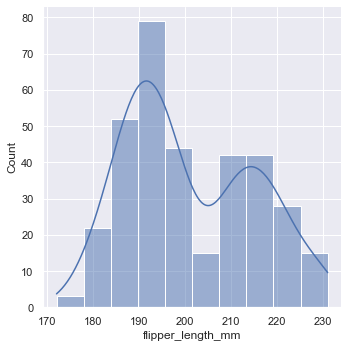

In [174]:
sns.displot(data=penguins, x="flipper_length_mm", kde=True);

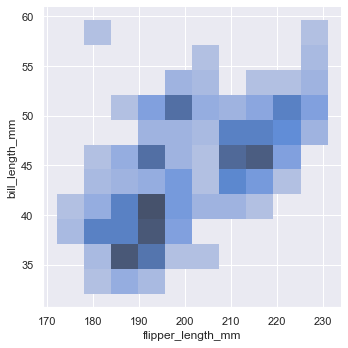

In [175]:
sns.displot(data=penguins, x="flipper_length_mm", y="bill_length_mm");

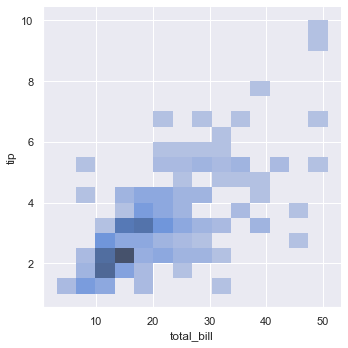

In [176]:
sns.displot(data=tips, x="total_bill", y="tip");

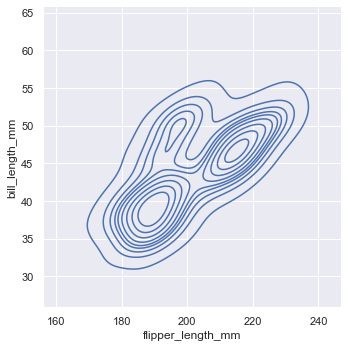

In [177]:
sns.displot(data=penguins, x="flipper_length_mm", y="bill_length_mm", kind="kde")

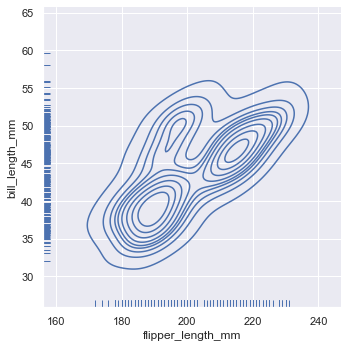

In [178]:
sns.displot(data=penguins, x="flipper_length_mm",
            y="bill_length_mm", kind="kde", rug=True);

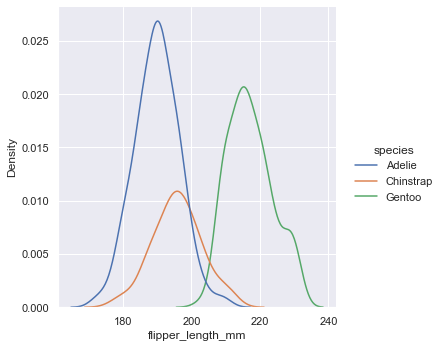

In [179]:
sns.displot(data=penguins, x="flipper_length_mm",
            hue="species", kind="kde");

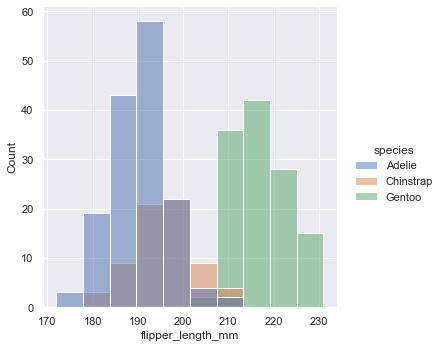

In [181]:
# multiple : {"layer", "dodge", "stack", "fill"}
sns.displot(data=penguins, x="flipper_length_mm",
            hue="species", multiple="layer")

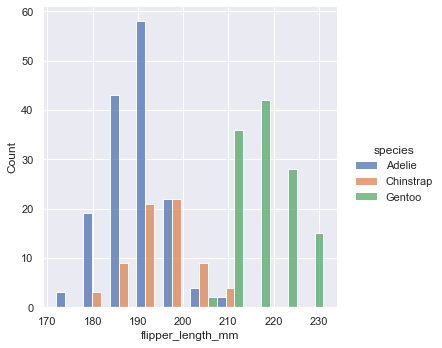

In [182]:
sns.displot(data=penguins, x="flipper_length_mm",
            hue="species", multiple="dodge")

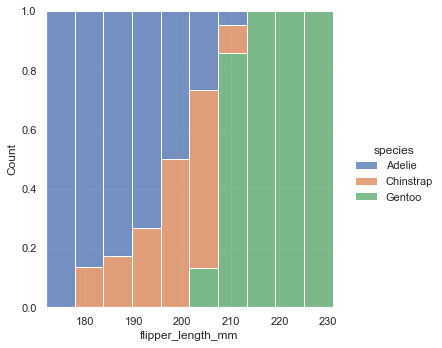

In [183]:
sns.displot(data=penguins, x="flipper_length_mm",
            hue="species", multiple="fill")

<Figure size 6000x3000 with 0 Axes>

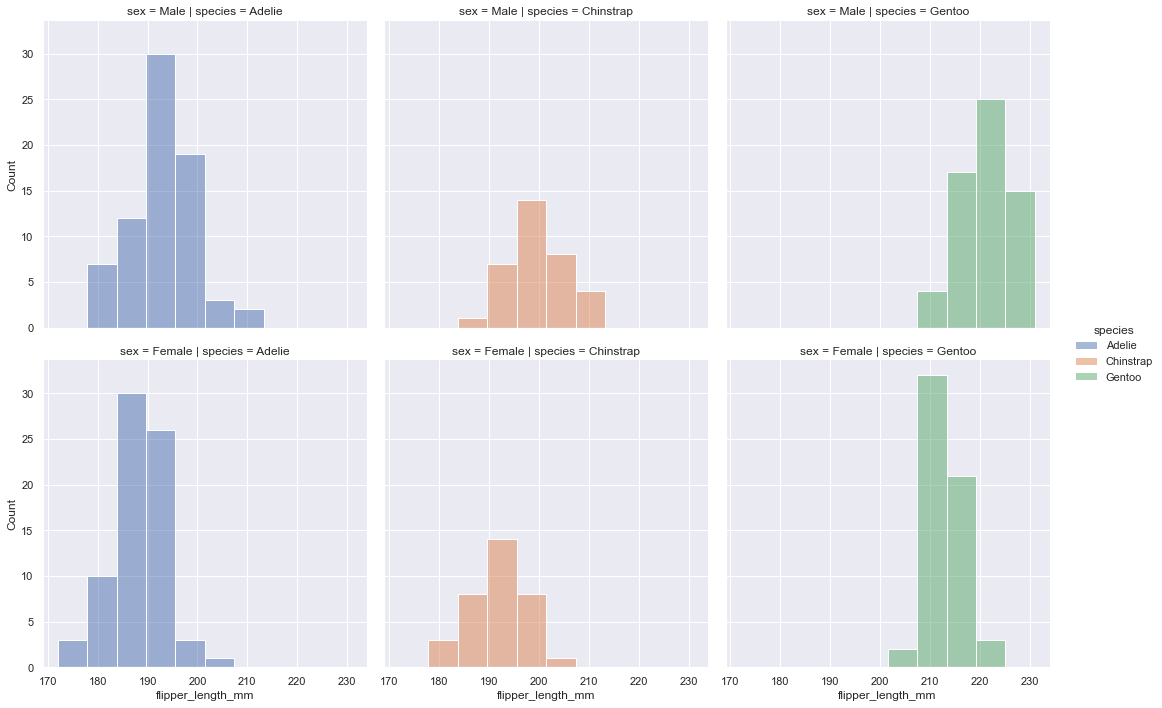

In [218]:
plt.figure(figsize=(20,10), dpi=300)
sns.displot(data=penguins, x="flipper_length_mm",
            hue="species",col="species", row="sex")

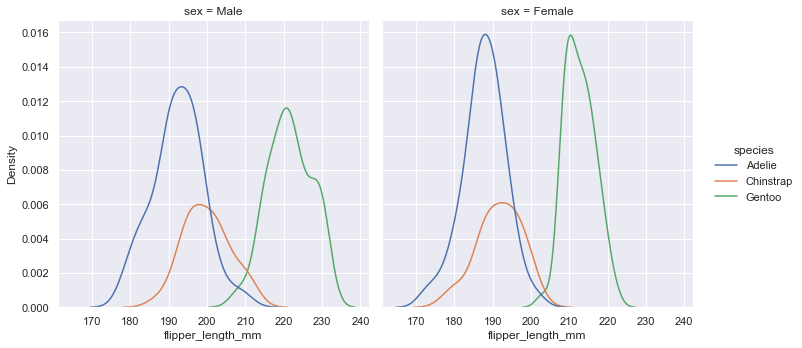

In [188]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species",
            col="sex", kind="kde")

<AxesSubplot:xlabel='total_bill', ylabel='Percent'>

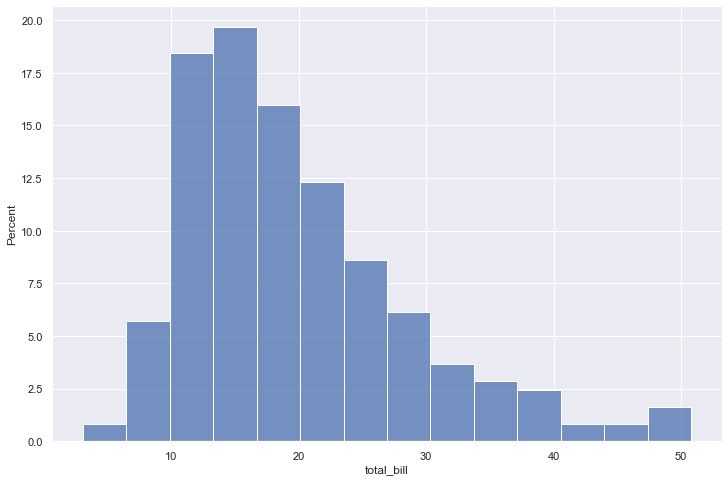

In [191]:
sns.histplot(data=tips, x="total_bill",stat="percent")

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

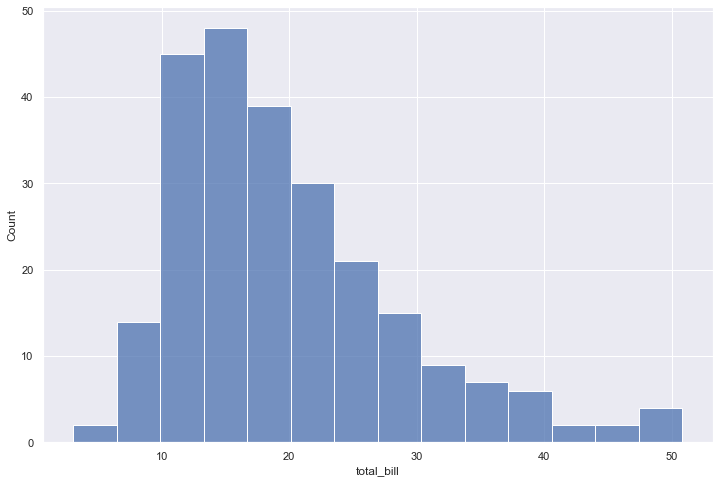

In [192]:
sns.histplot(data=tips, x="total_bill")

<AxesSubplot:xlabel='total_bill', ylabel='Probability'>

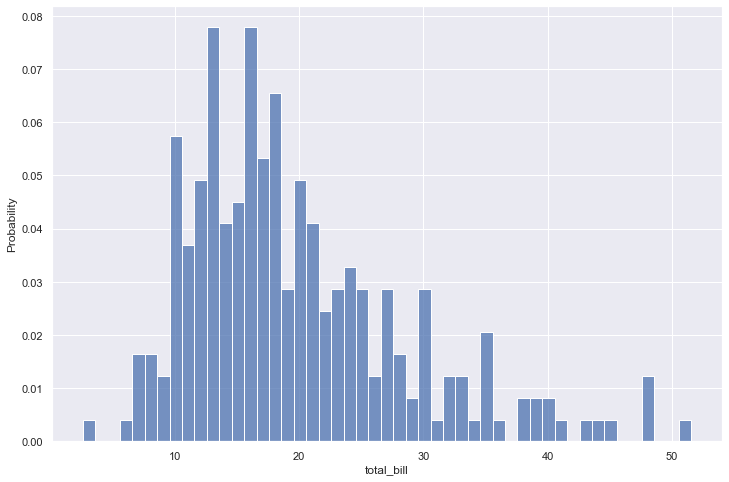

In [199]:
tips = sns.load_dataset("tips")
 
# Plot histogram
sns.histplot(data = tips, x = "total_bill", stat = "probability", 
            discrete = True)

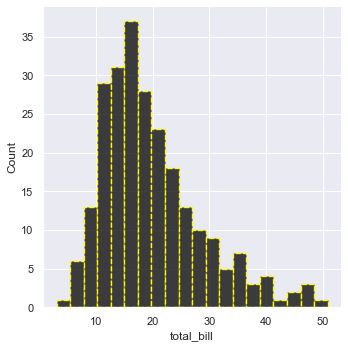

In [201]:
sns.displot(data=tips, x="total_bill",
            bins=20, color="black",
            edgecolor="yellow",
           lw=4, ls="--");

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

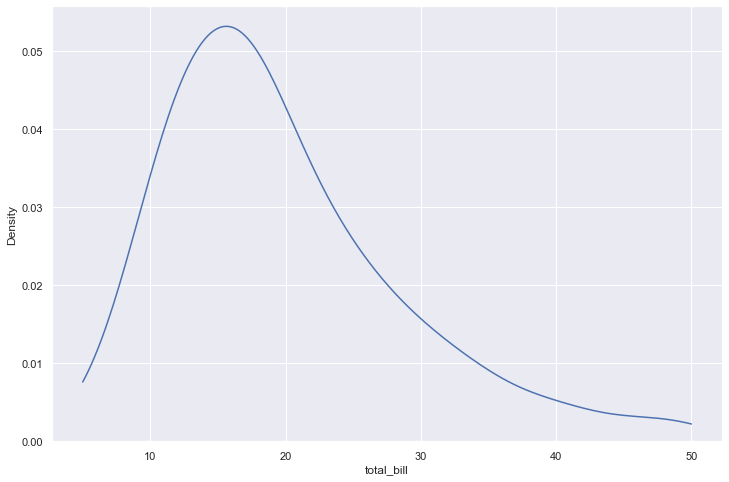

In [204]:
sns.kdeplot(x="total_bill", data=tips, clip=[5, 50])

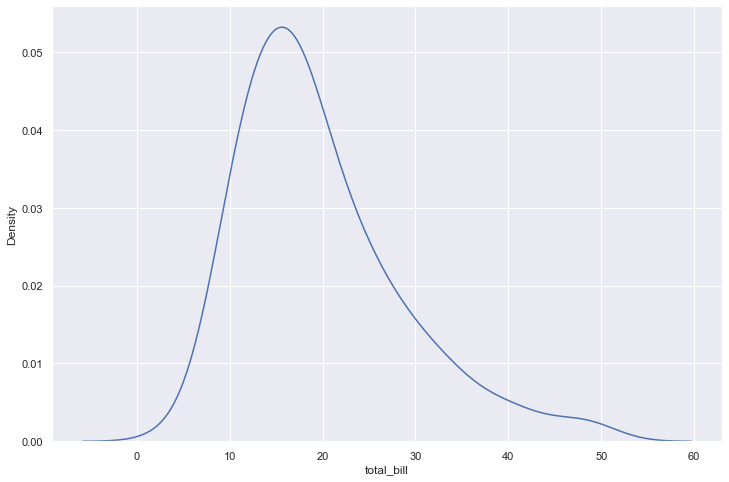

In [207]:
sns.kdeplot(x="total_bill", data=tips, bw_adjust=1);

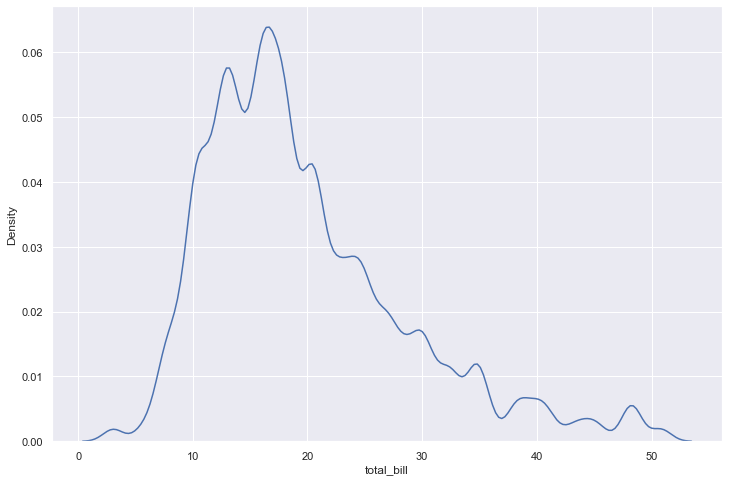

In [209]:
sns.kdeplot(data=tips, x="total_bill", bw_adjust=0.3);

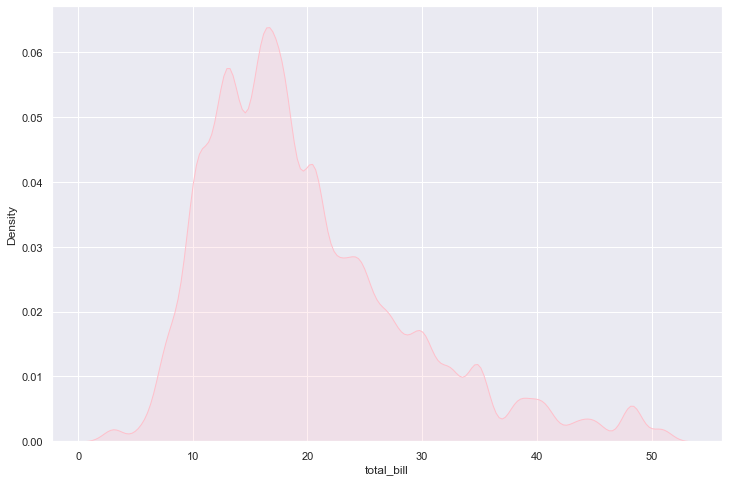

In [211]:
sns.kdeplot(data=tips, x="total_bill", bw_adjust=0.3, shade=True,
            color="pink");

In [212]:
data = pd.DataFrame(np.random.normal(0, 1, size=(100, 2)), columns=['x', 'y'])
data

x         y
0   0.884175 -0.122545
1  -0.450825 -0.271699
2  -0.119776 -0.288350
3  -0.692770 -0.849508
4  -0.068170  0.035378
..       ...       ...
95 -0.484525 -0.759656
96 -0.711543  0.611244
97  0.482557 -0.784593
98  0.563796  0.330004
99 -0.180835 -0.337247

[100 rows x 2 columns]

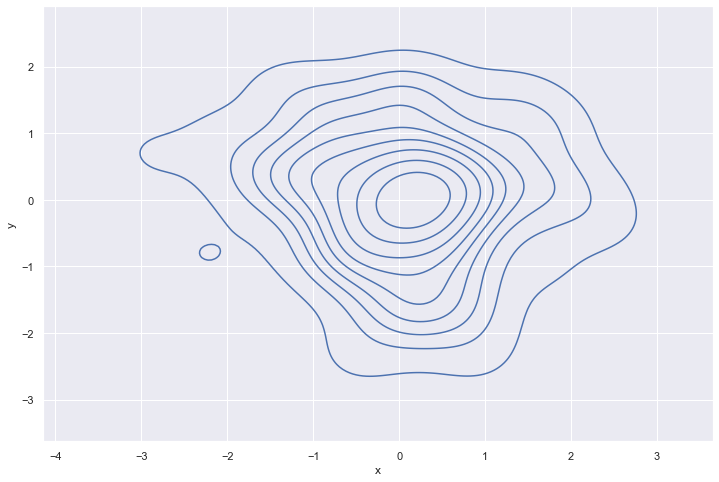

In [213]:
sns.kdeplot(x="x", y="y", data=data);

In [215]:
np.random.seed(101)

x = np.random.normal(0, 1, size=20)
x

array([ 2.70684984,  0.62813271,  0.90796945,  0.50382575,  0.65111795,
       -0.31931804, -0.84807698,  0.60596535, -2.01816824,  0.74012206,
        0.52881349, -0.58900053,  0.18869531, -0.75887206, -0.93323722,
        0.95505651,  0.19079432,  1.97875732,  2.60596728,  0.68350889])

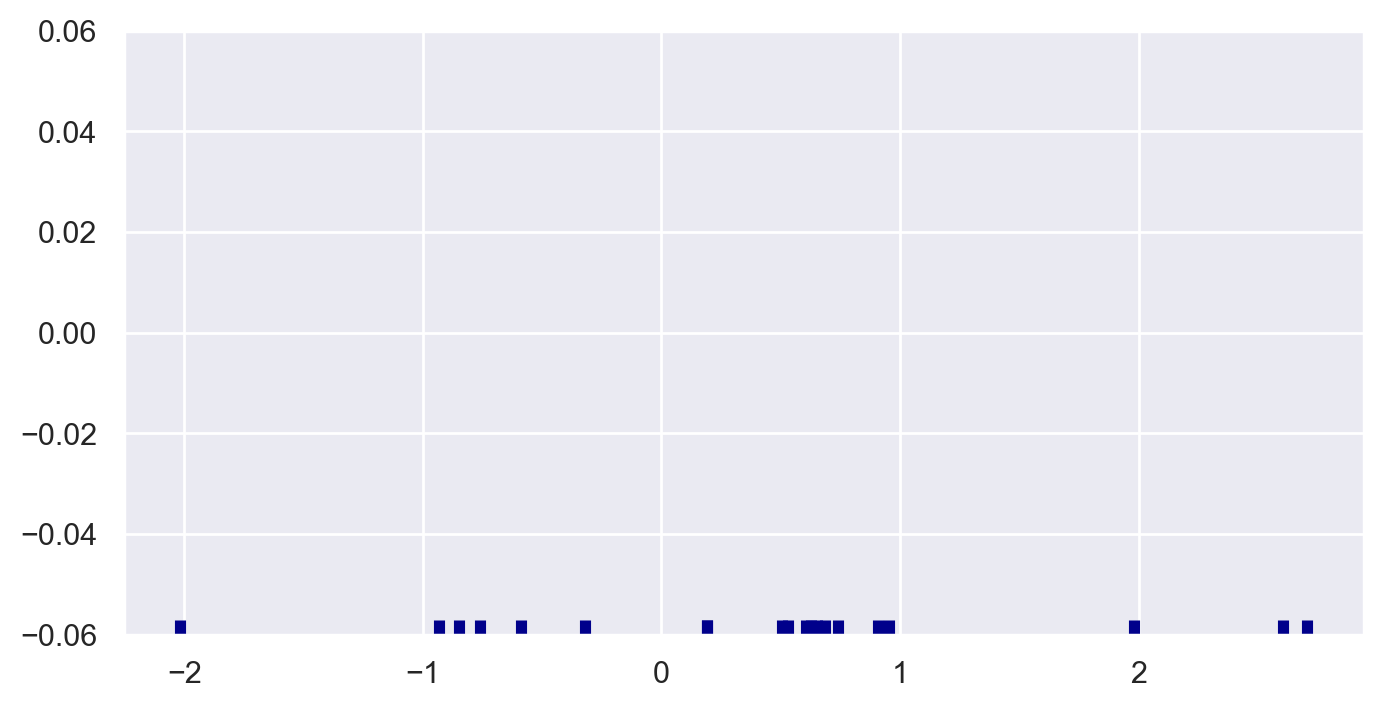

In [217]:
plt.figure(figsize=(8,4), dpi=200)
sns.rugplot(x=x, color="darkblue", linewidth=4);